# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

#### 2. Lee las imagenes
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

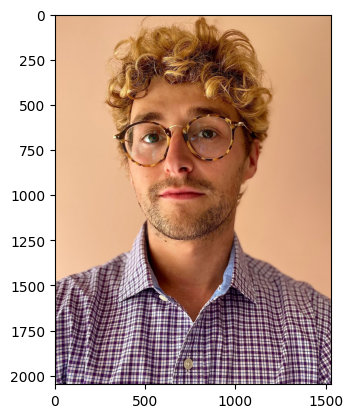

In [4]:
imagen = imread('C:\\Users\\horta\\Desktop\\yofeo.jpg')

plt.imshow(imagen)
plt.show()


Analizala

In [6]:
print("Dimensiones de la imagen:", imagen.shape)

print("Primeros píxeles de la imagen:", imagen[0,0,:])


Dimensiones de la imagen: (2048, 1532, 3)
Primeros píxeles de la imagen: [227 177 140]


Muestra la imagen para ver que se ha cargado bien

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [9]:
alto, ancho, colores = imagen.shape
imagen_modificada = imagen.reshape(alto*ancho, colores)
print("Nuevas dimensionedss de la imagen:", imagen_modificada.shape)


Nuevas dimensionedss de la imagen: (3137536, 3)


#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [12]:
imagen_reshaped = imagen.reshape(-1, 3)

kmeans = KMeans(n_clusters=num_colores)

kmeans.fit(imagen_reshaped)


C:\Users\horta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizas para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

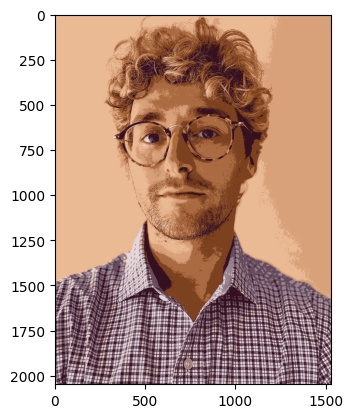

In [13]:
indices_centroides = kmeans.labels_
imagen_comprimida = kmeans.cluster_centers_[indices_centroides]
imagen_comprimida = np.clip(imagen_comprimida.astype('uint8'), 0, 255)

imagen_comprimida = imagen_comprimida.reshape(imagen.shape)
plt.imshow(imagen_comprimida)
plt.show()


#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

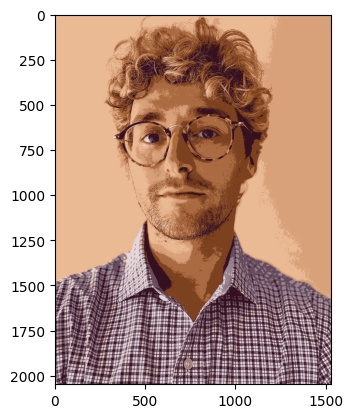

In [14]:
imagen_comprimida = imagen_comprimida.reshape(imagen.shape)

plt.imshow(imagen_comprimida)
plt.show()


#### 7. Imprime y guarda en tu ordenador la imagen resultante

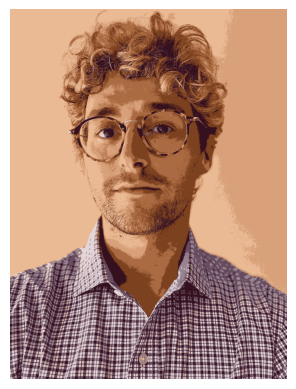

In [15]:
plt.imshow(imagen_comprimida)
plt.axis('off')
plt.show()

# Guardo en escritorio
ruta_guardado = 'C:\\Users\\horta\\Desktop\\imagen_resultante.jpg'
plt.imsave(ruta_guardado, imagen_comprimida)


#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [20]:


def comprimir_imagen(imagen, num_colores, guardar=False):
    imagen_original = imread(imagen)
    
    imagen_reshaped = imagen_original.reshape(-1, 3)
    
    kmeans = KMeans(n_clusters=num_colores)
    kmeans.fit(imagen_reshaped)
    
    imagen_comprimida = kmeans.cluster_centers_[kmeans.labels_]
    
    imagen_comprimida = imagen_comprimida.reshape(imagen_original.shape)
    
    imagen_comprimida /= 255.0
    
    if guardar:
        ruta_guardado = r'C:\Users\horta\Desktop\imagen_resultante.jpg'
        plt.imsave(ruta_guardado, imagen_comprimida)
        print("Imagen guardada en el escritorio.")
    else:
        plt.imshow(imagen_comprimida)
        plt.axis('off')
        plt.show()

ruta_imagen = r'C:\Users\horta\Desktop\yofeo.jpg'
num_colores = 8
guardar = True

comprimir_imagen(ruta_imagen, num_colores, guardar)



C:\Users\horta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Imagen guardada en el escritorio.
